In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
df = pd.read_csv("C:/Users/ftaki/OneDrive/Escritorio/652/Group Assignment/Files/FA1 Scenario Dataset - Rolling Stock Fleet.csv")
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2014 (km),HourMeter2014 (hours),DowntimeHours2014 (hours),LaborHours2014 (hours)
0,A0006,"VAN, MINI, 7 PASSENGER",Light Duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",Light Duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",Light Duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",Light Duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",Light Duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [3]:
# Find missing data
missing_values = df.isna().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Mileage2014 (km)             332
HourMeter2014 (hours)        825
DowntimeHours2014 (hours)    104
LaborHours2014 (hours)       104
dtype: int64


In [14]:
#dropping null from multiple columns
columns_to_check = ['Mileage2014 (km)','DowntimeHours2014 (hours)','LaborHours2014 (hours)']
df_cleaned = df.dropna(subset=columns_to_check)

print(df_cleaned)

     Equipment Number                                   Equipment Class  \
0                A0006                           VAN, MINI, 7 PASSENGER   
1                A0128                   AUTO, PASSENGER, COMPACT WAGON   
2                A0129                   AUTO, PASSENGER, MICRO COMPACT   
3                A0131                   AUTO, PASSENGER, MICRO COMPACT   
4                A0149                   AUTO, PASSENGER, COMPACT WAGON   
...                ...                                              ...   
1146             E2462                  SWEEPER, AIR, 4 WHEEL, 8 CU.YD.   
1147             E2464                  SWEEPER, AIR, 4 WHEEL, 8 CU.YD.   
1148             E2465                  SWEEPER, AIR, 4 WHEEL, 8 CU.YD.   
1149             E7543  TRUCK, REFUSE, REAR LOADER, 8 YARD, DIESEL/ELEC   
1168             F7663  TRUCK, REFUSE, REAR LOADER, 8 YARD, DIESEL/ELEC   

     Equipment Category         Service Group  \
0            Light Duty  Engineering Services   
1

(array([549.,   0., 258.,   0., 378.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

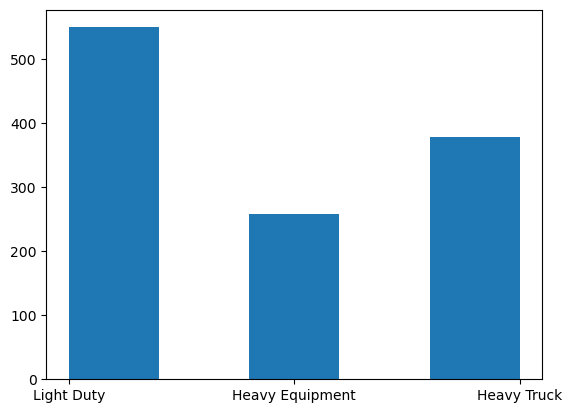

In [15]:
#sns.displot(df["Equipment Category"])
#plt.show()

#plt.scatter(X=df.Equipment Category, Y=df.Equipment Number, color='red')
plt.hist(x='Equipment Category', data=df, bins = 5)
#plt.hist(x='Service Group', data=df, bins = 5)

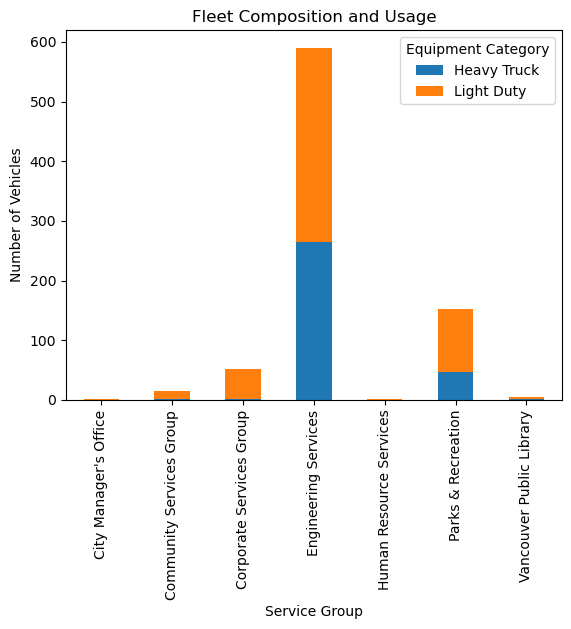

In [16]:
# a) Fleet composition and usage by user group and/or fleet type
fleet_composition = df_cleaned.groupby(['Service Group', 'Equipment Category']).size().unstack().plot(kind='bar', stacked=True)
fleet_composition.set_ylabel('Number of Vehicles')
fleet_composition.set_title('Fleet Composition and Usage')
plt.show()

In [17]:
# b) Observations into downtime and labor hours by equipment category
downtime_labor_observations = df_cleaned.groupby('Equipment Category')[['DowntimeHours2014 (hours)', 'LaborHours2014 (hours)']].sum()
print("Observations into Downtime and Labor Hours by Equipment Category:")
print(downtime_labor_observations)


Observations into Downtime and Labor Hours by Equipment Category:
                    DowntimeHours2014 (hours)  LaborHours2014 (hours)
Equipment Category                                                   
Heavy Truck                     100328.893569             28280.28833
Light Duty                       57415.330250             10315.55485


In [18]:
emission_data = df

In [19]:
emission_df = pd.DataFrame(emission_data)

In [21]:
df2 = pd.read_excel("C:/Users/ftaki/OneDrive/Escritorio/652/Group Assignment/df2.xlsx")
df2.head()

,Model_Year,Tailpipe_emissions,Flex Fuel_Vehicles,Innovative_Technologies,Air_Conditioning,CH4 & N2O,Compliance_value,Standard,Compliance_margin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,261.0,2.8,0.2,3.3,--,255.0,291.0,36.0
2,2012.0,250.0,3.3,0.5,4.8,0.2,242.0,263.0,21.0
3,2013.0,247.0,3.3,0.4,5.4,0.4,238.0,256.0,18.0
4,2014.0,245.0,3.7,1.5,6.0,0.3,234.0,248.0,14.0


In [24]:
# Merge the two datasets on 'Model Year'
merged_df = pd.merge(df2, df, left_on='Model_Year', right_on='Year')

In [26]:
# Define features and target
features = ['Tailpipe_emissions', 'Flex Fuel_Vehicles', 'Innovative_Technologies', 'Air_Conditioning', 'CH4 & N2O']
target = 'Compliance_margin'

In [65]:
# Filter data for light-duty equipment
light_duty_data = merged_df[merged_df['Equipment Category'] == 'Light Duty']

In [66]:
# Replace NaN with 0
df.fillna(0, inplace=True)

In [69]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(light_duty_data, light_duty_data, test_size=0.2, random_state=40)
#X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [70]:
X = df[['Year','Mileage2014 (km)']]
y = df['DowntimeHours2014 (hours)']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [72]:
y_train

1115      0.000000
684      24.343055
40      452.409727
338     128.286391
1098     34.003889
           ...    
90      123.278611
851     109.498335
825      85.188889
337      33.542778
1166    223.678609
Name: DowntimeHours2014 (hours), Length: 948, dtype: float64

In [73]:
X_test

,Year,Mileage2014 (km)
948,2013,9019.0
930,2013,7242.0
301,2014,0.0
189,2003,11739.0
666,2009,24242.0
...,...,...
409,2002,5264.0
1157,2012,0.0
183,2003,4422.0
333,2004,0.0


In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential


In [117]:
# Train a linear regression model
model = LinearRegression()

In [118]:
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [120]:
# Calculate the average fleet emission function based on equipment class, mileage, make and year
average_emission_function = light_duty_data.groupby(['Equipment Class', 'Make', 'Year']).agg({'Tailpipe_emissions': 'mean'}).reset_index()

In [121]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 63691.3241536824


In [80]:
# Set the target reduction percentage
target_reduction_percentage = 20

In [86]:
# Identify departments and reduction amounts for the target reduction
reduction_info = light_duty_data.groupby("Department").apply(lambda x: {
    'ReductionAmount': x['Tailpipe_emissions'].sum() * (target_reduction_percentage / 100),
    'OriginalEmissions': x['Tailpipe_emissions'].sum()
}).reset_index()

In [87]:
# Display the reduction information
print(reduction_info)

                                     Department  \
0                                      CEMETERY   
1                          CITY CARPOOL PROGRAM   
2                          CITY MANAGERS OFFICE   
3                      COMMUNITY SERVICES GROUP   
4   COMMUNITY SERVICES GROUP NON-MARKET HOUSING   
5                   ENGINEERING EQS LOANER POOL   
6               ENGINEERING EQUIPMENT CAR SHARE   
7                 ENGINEERING EQUIPMENT MNGMNT.   
8                   ENGINEERING EQUIPMENT OPER.   
9           ENGINEERING KENT CONSTRUCTION S & S   
10   ENGINEERING PARKING OPERATIONS ENFORCEMENT   
11                         ENGINEERING PROJECTS   
12                 ENGINEERING SANITATION OPER.   
13                     ENGINEERING SEWERS OPER.   
14               ENGINEERING SOLID WASTE MNGMNT   
15                   ENGINEERING STREETS DESIGN   
16                    ENGINEERING STREETS OPER.   
17               ENGINEERING TRAFF & ELEC SRVCS   
18      ENGINEERING TRANSFER AN

In [109]:
# define the keras model
RSF_model = Sequential()

In [110]:
# add the 1st hidden layer with 12 nodes and 8 variables
RSF_model.add(Dense(12, input_shape=(8,), activation = 'relu'))

In [111]:
# add the 2nd hidden layer with 8 nodes
RSF_model.add(Dense(12, activation = 'relu'))

In [112]:
# define the output layer with one node that uses relu activation
RSF_model.add(Dense(1, activation = 'relu'))

In [113]:
# complie the keras model
RSF_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
# fit tje keras model on the dataset
RSF_model.fit(X, y, epochs = 1000, batch_size= 50)

Epoch 1/1000


ValueError: in user code:

    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ftaki\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 2)


In [108]:
# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
accuracy = model.evaluate(X,y)

AttributeError: 'LinearRegression' object has no attribute 'evaluate'

In [107]:
print('Accuracy: %.2f' % (accuracy*100))

NameError: name 'accuracy' is not defined